In [1]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import math
import time

np.set_printoptions(threshold=np.inf)


from pynq import Overlay
ol = Overlay('/home/xilinx/jupyter_notebooks/joshi_final_project/dma_axis_ip_example.bit')

In [2]:
# ol?
# ol.ip_dict

In [3]:
# ol.gaussianBlur_0?

In [4]:
dma = ol.axi_dma
dma_send = ol.axi_dma.sendchannel
dma_recv = ol.axi_dma.recvchannel

In [5]:
hls_ip = ol.gaussianBlur_0
CONTROL_REGISTER = 0x0
hls_ip.write(CONTROL_REGISTER, 0x81)
hls_ip.register_map

RegisterMap {
  CTRL = Register(AP_START=1, AP_DONE=0, AP_IDLE=0, AP_READY=0, RESERVED_1=0, AUTO_RESTART=1, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0)
}

In [6]:
def importImages(name):

    image_info = {}
    
    # original_image = cv2.imread('cameraman.jpg')
    noisy_image = cv2.imread(name)


    # cv2.imshow('Image1', original_image)
#     cv2.imshow('Input', noisy_image)

    height, width, channels = noisy_image.shape

    cv2.waitKey(0)
    cv2.destroyAllWindows()


    image_info['height'] = height
    image_info['width'] = width
    image_info['channels'] = channels
    image_info['image'] = noisy_image # list of list image values


    noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)
    image_info['bw_image'] = noisy_image #single string image
    
    return image_info


In [7]:
def buildImage(pixel_values, dimension, original_image, bw_image):

    image_array = np.array(pixel_values).reshape((dimension, dimension))

    image_array = np.uint8(image_array)

    # Create the image using cv2
    final_image = cv2.resize(image_array, (dimension, dimension), interpolation=cv2.INTER_NEAREST)

    # Display the image
    # cv2.imshow('original input', original_image)
#     cv2.imshow('black and white input', bw_image)
#     cv2.imshow('Output', final_image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

    return final_image

In [8]:
#print images: 
def printImages(original_image, final_image): 
    
    plt.figure(figsize=(12, 12))  # Set the size of the figure

    plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot number 1
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')  # Turn off axis
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot number 2
    plt.imshow(final_image, cmap='gray')
    plt.axis('off')  # Turn off axis
    plt.title('Final Image')
    

In [9]:
def gaussianBlur(window):
    #converting window mat into string
    output_img = []
    
    dma_arr = []
    for i in range(len(window)):
        for j in range(len(window)):
            dma_arr.append(window[i][j])
    
    data_size = len(window) * len(window)
    input_buffer = allocate(shape=(data_size,), dtype=np.uint32)
    for i in range(data_size):
        input_buffer[i] = dma_arr[i] 
        
    output_buffer = allocate(shape=(data_size,), dtype=np.uint32)
    dma_send.transfer(input_buffer)
    print(input_buffer)
    dma_recv.transfer(output_buffer)
        
    output_img.append(output_buffer)
    
    print(output_img)
    
    del input_buffer, output_buffer
    
    
    return output_img

In [10]:
# grabs images
image_info = importImages('barb_noisy.jpg')

In [11]:
print(image_info['bw_image'])

[[157 152 189 225 197 164 130 142  87 141 125 123  99 113  77 117  48  50
  126  66  95  90  34  76  27  96  32  66  73  72 109 112 169 132 164 122
  134 168 149 158 193 190 176 122 187 172 189 199 163 195 180 188 147 114
  111 112 105 101  75 101  90  99  42  62  33  69  85  97 148 101 137 168
  149 163 179 178 208 190 156 203 177 171  98 118 122  95  74 125 155 166
  172 133 201 177 127 169 134 124 134  72 175 117 179 160 196 142 189 169
  200 144 134 130 175 114 168 124 156 160 179 137 102 148 164 184 155 161
  157 122 160 136 160 138 143 155 160 165 128 143 141 151 158 144 183 120
  154 108 117 142 159 185 146 123  57 127  49 100 123 119 102  81 100  73
   82 105  72 118  39  83 130 113  77 109 115  79 109  90 122  50  75 124
   86 130 105 104 111 137 169 105 146 104  95 103 122 142 110 129 109 106
  101 115  93 102  79 130 104  69  47 114 114 119 152  95  85  98 111 117
  121  91  84 122 146 133 230 219 193 214 191 255 253 220 248 191 165 209
  169 167 248 167 199 179 127 108 128 

In [12]:
from pynq import allocate

# blurs the image (This part is to be converted into HLS
start = time.time()
image_info['gaussian_blur'] = gaussianBlur(image_info['bw_image'])
stop = time.time()

[157 152 189 225 197 164 130 142  87 141 125 123  99 113  77 117  48  50
 126  66  95  90  34  76  27  96  32  66  73  72 109 112 169 132 164 122
 134 168 149 158 193 190 176 122 187 172 189 199 163 195 180 188 147 114
 111 112 105 101  75 101  90  99  42  62  33  69  85  97 148 101 137 168
 149 163 179 178 208 190 156 203 177 171  98 118 122  95  74 125 155 166
 172 133 201 177 127 169 134 124 134  72 175 117 179 160 196 142 189 169
 200 144 134 130 175 114 168 124 156 160 179 137 102 148 164 184 155 161
 157 122 160 136 160 138 143 155 160 165 128 143 141 151 158 144 183 120
 154 108 117 142 159 185 146 123  57 127  49 100 123 119 102  81 100  73
  82 105  72 118  39  83 130 113  77 109 115  79 109  90 122  50  75 124
  86 130 105 104 111 137 169 105 146 104  95 103 122 142 110 129 109 106
 101 115  93 102  79 130 104  69  47 114 114 119 152  95  85  98 111 117
 121  91  84 122 146 133 230 219 193 214 191 255 253 220 248 191 165 209
 169 167 248 167 199 179 127 108 128 113  59 118  9

In [13]:
# rebuilds the final image
image_info['final_image'] = buildImage(image_info['gaussian_blur'], image_info['height'], image_info['image'], image_info['bw_image'])

Execution time for PS: 84.98245644569397 seconds using a 3x3 gaussian kernel


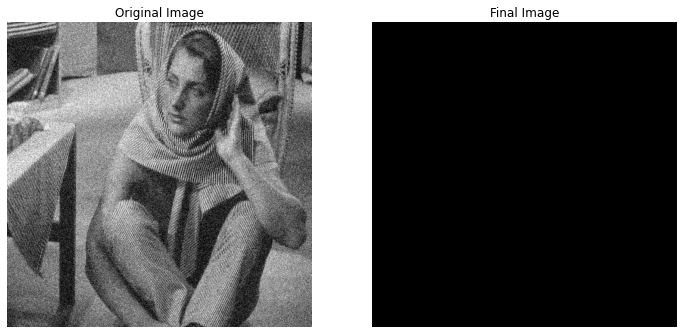

In [14]:
#output the images in matplotlib
printImages(image_info['bw_image'], image_info['final_image'])
print("Execution time for PS: " + str((stop - start)) + " seconds using a 3x3 gaussian kernel")